# Wheat seeds case

### Case Type
* Multivariate categorical target (3 classes).
* Balance classes.
* Numeric features.
* Small number pool of data (210 instances).
* Small pool of features (7 features).
* Minimal data cleaning required.
* Benchmark accuracy is 28%.

### Goal
To predict the variety of the wheat seed based on its properties.


### Sources
http://archive.ics.uci.edu/ml/datasets/seeds (Data download and description, as pasted below).
https://machinelearningmastery.com/standard-machine-learning-datasets/

### Description
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin. 

### Imports

In [14]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

### Load Data

In [15]:
#compactness C = 4*pi*area/perimeter^2, 
cols = ['area', 'perimeter', 'compactness',
        'length_kernel', 'width_kernel',
        'assymetry', 'length_groove', 'class']

df = pd.read_csv('./data/seeds_dataset.txt', names=cols,
                 delim_whitespace=True, header=None)
df.head()

,area,perimeter,compactness,length_kernel,width_kernel,assymetry,length_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Data Analysis

In [16]:
#Inspect data for NaN.
print('Dataframe shape: ', df.shape)
print(df.isna().sum())

#In this case, we have no NaN. If we had any, we could either exclude those rows
#or perform data imputation.
df.dropna(axis='rows', inplace=True)
print('Dataframe shape: ', df.shape)

Dataframe shape:  (210, 8)
area             0
perimeter        0
compactness      0
length_kernel    0
width_kernel     0
assymetry        0
length_groove    0
class            0
dtype: int64
Dataframe shape:  (210, 8)


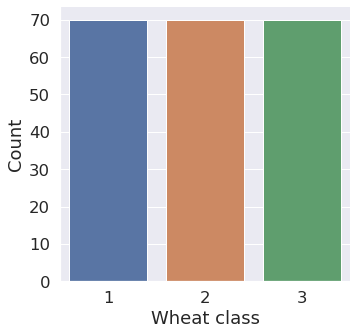

In [17]:
#Check the balance of target class.
sns.set(font_scale=1.5)
sns.catplot(kind='count', data=df, x='class').set_axis_labels('Wheat class', 'Count')

In [18]:
#Investigate variables pair-wise.

(8.0, 0.0)

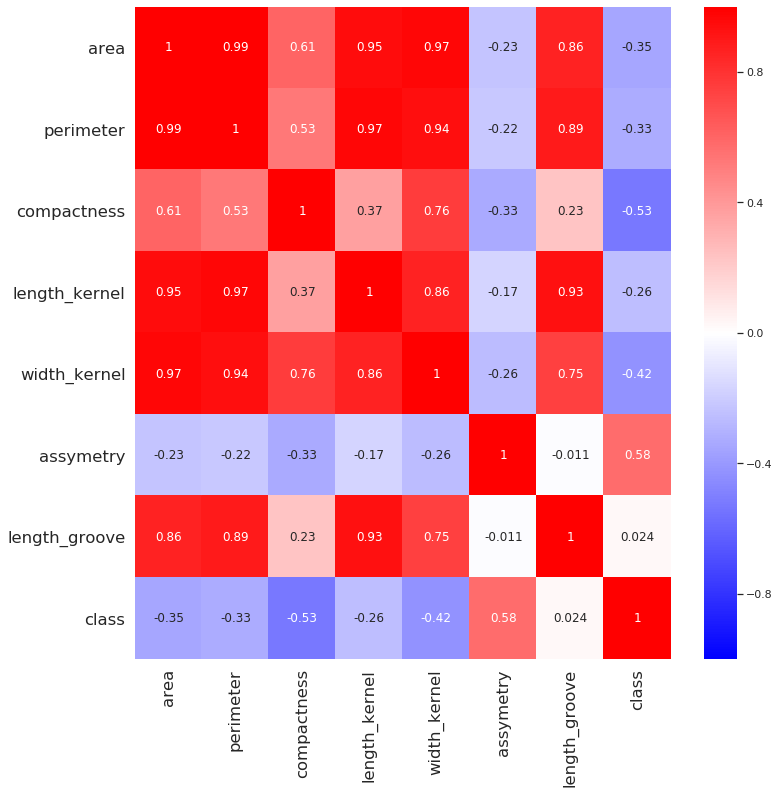

In [19]:
#Investigate the correlation matrix.
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.)
sns.heatmap(df.corr(), cmap='bwr', annot=True, ax=ax, vmin=-1., vmax=1.)

#Fix first and last rows. (Bug in recent matplotlib)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Split the data between train and test sets

In [20]:
#Separate the data into target (y) and features (X)
y = df['class'].values
df.drop(['class'], axis=1, inplace=True)
X = df.values

Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, test_size=0.5, random_state=0)

### Standardize Data

In [21]:
#Scale all features to similar range of values.
#This prevents absolute numbers from dominating the learning process.

scaler = StandardScaler()
scaler.fit(Train_X)
Train_X_scaled = scaler.transform(Train_X)
Test_X_scaled = scaler.transform(Test_X)

### Use linearSVC as a benchmark model

In [22]:
clf = LinearSVC(random_state=0, C=1)
clf.fit(Train_X_scaled, Train_y)
pred_y = clf.predict(Test_X_scaled)

In [23]:
print('Benchmark accuracy is: ', metrics.accuracy_score(Test_y, pred_y))

Benchmark accuracy is:  0.9523809523809523


### This problem is simple enough that the benchmark model performs incredibly well. No point in running the optimizations below.

### Feature engineering (selection)

### Hyper-parameter tuning in LinearSCV

### Test K-Neighbors classifier as a contender method

### Test non-linear SVC classifier as a contender method